In [2]:
import pandas as pd

In [3]:
data_set_loc = "data/abalone/abalone.data"
column_name = "Rings"
column_names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]

In [4]:
abalone = pd.read_csv(data_set_loc, names=column_names)

In [5]:
abalone.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

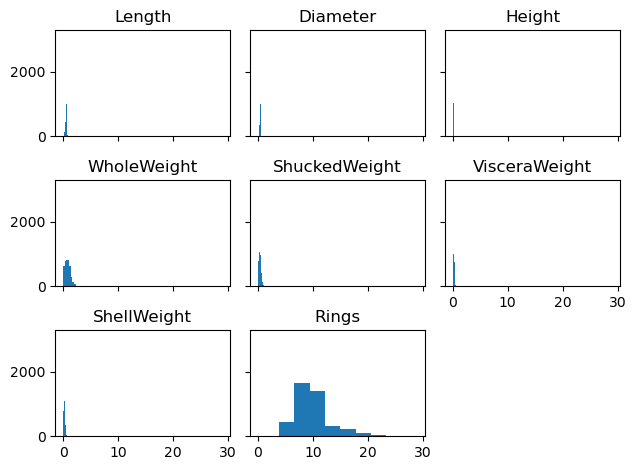

In [7]:
_ = abalone.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

<Axes: >

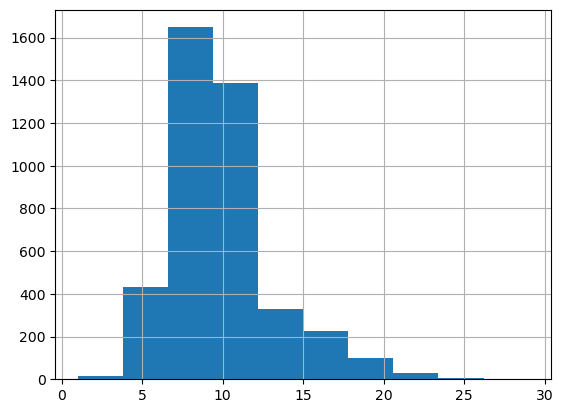

In [8]:
abalone[column_name].hist()

In [9]:
abalone.fillna(value={column_name: abalone[column_name].mean()}, inplace=True)
abalone

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
abalone_mean = abalone.mean(numeric_only=True)
abalone_mean

Length           0.523992
Diameter         0.407881
Height           0.139516
WholeWeight      0.828742
ShuckedWeight    0.359367
VisceraWeight    0.180594
ShellWeight      0.238831
Rings            9.933684
dtype: float64

In [11]:
abalone_var = abalone.var(numeric_only=True)
abalone_var

Length            0.014422
Diameter          0.009849
Height            0.001750
WholeWeight       0.240481
ShuckedWeight     0.049268
VisceraWeight     0.012015
ShellWeight       0.019377
Rings            10.395266
dtype: float64

In [12]:
abalone_std = abalone.std(numeric_only=True)
abalone_std

Length           0.120093
Diameter         0.099240
Height           0.041827
WholeWeight      0.490389
ShuckedWeight    0.221963
VisceraWeight    0.109614
ShellWeight      0.139203
Rings            3.224169
dtype: float64

In [13]:
def calculate_gamma_parameters(sample_means, sample_variances):
    # Calculate alpha (α) and beta (β) using the method of moments
    alpha = sample_means ** 2/ sample_variances
    beta = sample_variances / sample_means
    return alpha, beta

In [14]:
alpha_mom, beta_mom = calculate_gamma_parameters(abalone_mean, abalone_var)

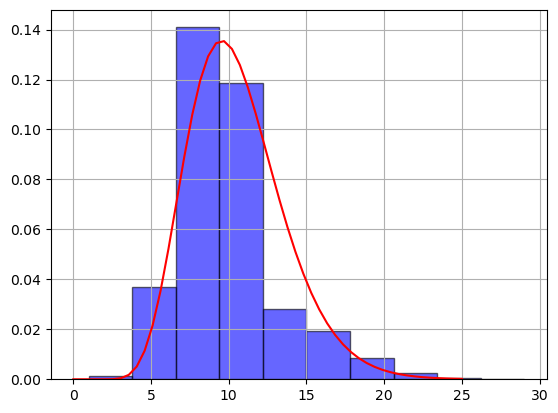

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats.distributions import gamma

abalone[column_name].hist(density=True, alpha=0.6, color='b', edgecolor='k')
plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), alpha_mom[column_name], beta_mom[column_name]), 'r')
plt.show()

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import expon, norm, uniform, poisson, gamma

def mom_estimator(data, distributions):
    estimators = {}

    for dist_name, dist_label in distributions:
        if dist_name == "exponential":
            sample_mean = data.mean()
            lambda_mom = 1 / sample_mean
            estimators[dist_label] = f"MOM Estimator for {dist_label}: λ = {lambda_mom:.6f}"
        elif dist_name == "normal":
            sample_mean = data.mean()
            sample_std = data.std()
            estimators[dist_label] = f"MOM Estimators for {dist_label}: Mean = {sample_mean:.6f}, Standard Deviation = {sample_std:.6f}"
        elif dist_name == "uniform":
            estimators[dist_label] = f"MOM Estimators for {dist_label}: Minimum = {data.min()}, Maximum = {data.max()}"
        elif dist_name == "poisson":
            sample_mean = data.mean()
            estimators[dist_label] = f"MOM Estimator for {dist_label}: λ = {sample_mean:.6f}"
        elif dist_name == "gamma":
            sample_mean = data.mean()
            sample_var = data.var()
            alpha_mom = sample_mean**2 / sample_var
            beta_mom = sample_var / sample_mean
            estimators[dist_label] = f"MOM Estimators for {dist_label}: Shape (α) = {alpha_mom:.6f}, Scale (β) = {beta_mom:.6f}"
        else:
            estimators[dist_label] = f"Distribution '{dist_name}' not recognized. MOM Estimators are not applicable."

    return estimators


In [17]:
distributions = [
    ("exponential", "Exponential"),
    ("normal", "Normal"),
    ("uniform", "Uniform"),
    ("poisson", "Poisson"),
    ("gamma", "Gamma")
]


data = abalone[column_name]  # Replace "area" with the column you want to analyze
mom_estimators = mom_estimator(data, distributions)
for dist_label, mom in mom_estimators.items():
    print(mom)

MOM Estimator for Exponential: λ = 0.100668
MOM Estimators for Normal: Mean = 9.933684, Standard Deviation = 3.224169
MOM Estimators for Uniform: Minimum = 1, Maximum = 29
MOM Estimator for Poisson: λ = 9.933684
MOM Estimators for Gamma: Shape (α) = 9.492599, Scale (β) = 1.046466


In [18]:
from scipy.stats import expon, norm, uniform, poisson, lognorm, gamma
import numpy as np

def analyze_distributions(data, column_name, specific_event, distributions):
    results = {}
    
    for distribution, params in distributions:
        if distribution == "exponential":
            lambda_mom = params
            prob_gt_event = 1 - expon.cdf(specific_event, loc=0, scale=1 / lambda_mom)
            num_samples = 1000
            loc, scale = 0, 1 / lambda_mom
            random_samples = expon.rvs(loc=loc, scale=scale, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
        elif distribution == "normal":
            mu, sigma = params
            prob_gt_event = 1 - norm.cdf(specific_event, loc=mu, scale=sigma)
            num_samples = 1000
            random_samples = norm.rvs(loc=mu, scale=sigma, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
        elif distribution == "uniform":
            loc, scale = params
            prob_gt_event = 1 - uniform.cdf(specific_event, loc=loc, scale=scale)
            num_samples = 1000
            random_samples = uniform.rvs(loc=loc, scale=scale, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
        elif distribution == "poisson":
            mu = params
            prob_gt_event = 1 - poisson.cdf(specific_event, mu)
            num_samples = 1000
            random_samples = poisson.rvs(mu, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
        elif distribution == "lognormal":
            s, loc, scale = params
            prob_gt_event = 1 - lognorm.cdf(specific_event, s=s, loc=loc, scale=scale)
            num_samples = 1000
            random_samples = lognorm.rvs(s=s, loc=loc, scale=scale, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
        elif distribution == "gamma":
            a, loc, scale = params
            prob_gt_event = 1 - gamma.cdf(specific_event, a=a, loc=loc, scale=scale)
            num_samples = 1000
            random_samples = gamma.rvs(a=a, loc=loc, scale=scale, size=num_samples)
            results[distribution] = (prob_gt_event, random_samples)
    
    return results

In [19]:
# The variable "specific_event" is a threshold value, 
# Calculating the probability that "X" exceeds this threshold for the respective distribution.

data = abalone[column_name]
specific_event = 10

shape_mom = (data.mean() ** 2) / data.var()
scale_mom = data.var() / data.mean()

distributions = [
    # ("exponential", 1 / data.mean()),  # Exponential distribution with lambda_MOM
    # ("normal", (data.mean(), data.std())),  # Normal distribution with mean and standard deviation
    # ("uniform", (data.min(), data.max())),  # Uniform distribution with min and max
    # ("poisson", data.mean()),  # Poisson distribution with lambda
    # ("lognormal", (1, 0, np.exp(data.mean()))),  # Log-Normal distribution with shape, loc, and scale
    ("gamma", (shape_mom, 0, scale_mom))  # Gamma distribution with shape, loc, and scale
]

results = analyze_distributions(data, column_name, specific_event, distributions)

for distribution, (prob_gt_event, random_samples) in results.items():
    print(f"Distribution: {distribution}")
    print(f"Probability of X > {specific_event}: {prob_gt_event:.6f}")
    print(f"First 10 random samples: {random_samples[:10]}\n")

Distribution: gamma
Probability of X > 10: 0.448713
First 10 random samples: [10.01569074  8.23042021  7.10220646  9.77008499 10.79565727  9.68918137
 11.46387949 13.28180805 11.90105975 17.13340627]

